## Notebook for the Viszualization of right principal components for 2H Data using grouped Barplots

ToDo:
    - Documentation
    - fix paths

In [1]:
import pandas as pd
import os
import errno  # handy system and path functions
import sys  # to get file system encoding
import glob
import locale
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.linalg
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import rcParams
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
         'figure.autolayout': True}
rcParams.update(params)
from scipy import signal
from scipy import stats
from sklearn import preprocessing

# np.set_printoptions(precision=28)
# pd.set_option('precision', 28)


# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/michael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# # Set the style globally
# plt.style.use('seaborn-white')

# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 12
# plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.dpi'] = 300

In [4]:
dir_ = '/home/michael/Desktop/model_evd/2H/*'
df_r1 = pd.DataFrame()
subjects_info = pd.DataFrame()
path = '/home/michael/Desktop/model_evd/2H/group_level/'
df_vafs = pd.DataFrame()
df_sub_5 = pd.DataFrame()
df_sub_07 = pd.DataFrame()
df_sub_12 = pd.DataFrame()
df_sub_left = pd.DataFrame()
df_sub_right = pd.DataFrame()

# /home/michael/Desktop/model_evd/1H/sub-01/l1/sub-01_l1model_evidence.csv
handedness = 'r'
for subject in (glob.glob(dir_)):

    subject_id = subject.split('/')[-1]
    print(subject_id)
    
    for filename in (glob.glob(subject+'/*')):
        pos_name = filename.split('/')[-1]
        print(pos_name)

        for x in (glob.glob(filename+'/*')):
            if x.split('_')[-1] == 'vaf.csv':

                VAF = pd.read_csv(x)

            elif x.split('_')[-1] == 'evidence.csv' and x.split('_')[-2] == 'model':
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                logPD = pd.read_csv(x, encoding='utf-8')
                logPD = logPD['0'].values

        if pos_name == 'r1':
            r1_logPD = logPD
            r1_vaf = VAF
        elif pos_name == 'r2':
            r2_logPD = logPD
            r2_vaf = VAF
        elif pos_name == 'r3':
            r3_logPD = logPD
            r3_vaf = VAF
        elif pos_name == 'm1_l':
            m1_l_logPD = logPD
            m1_l_vaf = VAF
        elif pos_name == 'm2_l':
            m2_l_logPD = logPD
            m2_l_vaf = VAF
        elif pos_name == 'm3_l':
            m3_l_logPD = logPD
            m3_l_vaf = VAF
        elif pos_name == 'm1_r':
            m1_r_logPD = logPD
            m1_r_vaf = VAF
        elif pos_name == 'm2_r':
            m2_r_logPD = logPD
            m2_r_vaf = VAF
        elif pos_name == 'm3_r':
            m3_r_logPD = logPD
            m3_r_vaf = VAF
        elif pos_name == 'l1':
            l1_logPD = logPD
            l1_vaf = VAF
        elif pos_name == 'l2':
            l2_logPD = logPD
            l2_vaf = VAF
    #             print('l2')
        elif pos_name == 'l3':
            l3_logPD = logPD
            l3_vaf = VAF
    #             print('here')
    df_vafs[subject_id+'_'+'r1'] = r1_vaf['0']
    df_vafs[subject_id+'_'+'r2'] = r2_vaf
    df_vafs[subject_id+'_'+'r3'] = r3_vaf

    df_vafs[subject_id+'_'+'m1_l'] = m1_l_vaf
    df_vafs[subject_id+'_'+'m2_l'] = m2_l_vaf
    df_vafs[subject_id+'_'+'m3_l'] = m3_l_vaf


    df_vafs[subject_id+'_'+'m1_r'] = m1_r_vaf
    df_vafs[subject_id+'_'+'m2_r'] = m2_r_vaf
    df_vafs[subject_id+'_'+'m3_r'] = m3_r_vaf

    df_vafs[subject_id+'_'+'l1'] = l1_vaf
    df_vafs[subject_id+'_'+'l2'] = l2_vaf
    df_vafs[subject_id+'_'+'l3'] = l3_vaf

    if subject_id =='sub-05':
        df_sub_5['r1'] = r1_vaf['0']
        df_sub_5['r2'] = r2_vaf
        df_sub_5['r3'] = r3_vaf

        df_sub_5['m1_l'] = m1_l_vaf
        df_sub_5['m2_l'] = m2_l_vaf
        df_sub_5['m3_l'] = m3_l_vaf

        df_sub_5['m1_r'] = m1_r_vaf
        df_sub_5['m2_r'] = m2_r_vaf
        df_sub_5['m3_r'] = m3_r_vaf

        df_sub_5['l1'] = l1_vaf
        df_sub_5['l2'] = l2_vaf
        df_sub_5['l3'] = l3_vaf
        
        
    elif subject_id == 'sub-12':
        df_sub_12['r1'] = r1_vaf['0']
        df_sub_12['r2'] = r2_vaf
        df_sub_12['r3'] = r3_vaf

        df_sub_12['m1_l'] = m1_l_vaf
        df_sub_12['m2_l'] = m2_l_vaf
        df_sub_12['m3_l'] = m3_l_vaf

        df_sub_12['m1_r'] = m1_r_vaf
        df_sub_12['m2_r'] = m2_r_vaf
        df_sub_12['m3_r'] = m3_r_vaf
        
        df_sub_12['l1'] = l1_vaf
        df_sub_12['l2'] = l2_vaf
        df_sub_12['l3'] = l3_vaf

    elif subject_id == 'sub-07':
        df_sub_07['r1'] = r1_vaf['0']
        df_sub_07['r2'] = r2_vaf
        df_sub_07['r3'] = r3_vaf

        df_sub_07['m1_l'] = m1_l_vaf
        df_sub_07['m2_l'] = m2_l_vaf
        df_sub_07['m3_l'] = m3_l_vaf
        


        df_sub_07['m1_r'] = m1_r_vaf
        df_sub_07['m2_r'] = m2_r_vaf
        df_sub_07['m3_r'] = m3_r_vaf


        df_sub_07['l1'] = l1_vaf
        df_sub_07['l2'] = l2_vaf
        df_sub_07['l3'] = l3_vaf

        
    df_sub_right[subject_id+'_'+'r1'] = r1_vaf['0']
    df_sub_right[subject_id+'_'+'r2'] = r2_vaf
    df_sub_right[subject_id+'_'+'r3'] = r3_vaf

    df_sub_left[subject_id+'_'+'m1_l'] = m1_l_vaf['0']
    df_sub_left[subject_id+'_'+'m2_l'] = m1_l_vaf
    df_sub_left[subject_id+'_'+'m3_l'] = m1_l_vaf

    df_sub_right[subject_id+'_'+'m1_r'] = m1_r_vaf
    df_sub_right[subject_id+'_'+'m2_r'] = m2_r_vaf
    df_sub_right[subject_id+'_'+'m3_r'] = m3_r_vaf

    df_sub_left[subject_id+'_'+'l1'] = l1_vaf
    df_sub_left[subject_id+'_'+'l2'] = l2_vaf
    df_sub_left[subject_id+'_'+'l3'] = l3_vaf 
        

sub_05_mean = df_sub_5.mean(axis=1)
sub_07_mean = df_sub_07.mean(axis=1)
sub_12_mean = df_sub_12.mean(axis=1)
left_mean = df_sub_left.mean(axis=1)
right_mean = df_sub_right.mean(axis=1)



sub-07
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_m3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m2_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_r
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m3_l
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r3_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
m1_l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
sub-09
m2_l2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
r1_m1


In [5]:
df_sub_left

,sub-07_m1_l,sub-07_m2_l,sub-07_m3_l,sub-07_l1,sub-07_l2,sub-07_l3,sub-01_m1_l,sub-01_m2_l,sub-01_m3_l,sub-01_l1,...,sub-11_m3_l,sub-11_l1,sub-11_l2,sub-11_l3,sub-10_m1_l,sub-10_m2_l,sub-10_m3_l,sub-10_l1,sub-10_l2,sub-10_l3
0,0.838291,0.838291,0.838291,0.720354,0.797316,0.825153,0.760720,0.760720,0.760720,0.820252,...,0.749038,0.754345,0.656863,0.827748,0.800973,0.800973,0.800973,0.853671,0.781676,0.907280
1,0.929570,0.929570,0.929570,0.949790,0.894493,0.954100,0.894706,0.894706,0.894706,0.936284,...,0.895094,0.944450,0.890463,0.948714,0.931324,0.931324,0.931324,0.968810,0.889659,0.974176
2,0.981953,0.981953,0.981953,0.982265,0.954029,0.984000,0.955109,0.955109,0.955109,0.970845,...,0.976903,0.979395,0.933775,0.981126,0.984210,0.984210,0.984210,0.988055,0.940547,0.985004
3,0.991637,0.991637,0.991637,0.991817,0.976785,0.990133,0.971786,0.971786,0.971786,0.981468,...,0.987106,0.987844,0.967033,0.989730,0.991083,0.991083,0.991083,0.993249,0.969526,0.992299
4,0.996101,0.996101,0.996101,0.995847,0.991001,0.994376,0.983111,0.983111,0.983111,0.989331,...,0.993442,0.993797,0.983669,0.995082,0.997117,0.997117,0.997117,0.997386,0.986818,0.997006
5,0.997902,0.997902,0.997902,0.998188,0.995973,0.997309,0.991384,0.991384,0.991384,0.994437,...,0.997640,0.997857,0.994835,0.997505,0.998184,0.998184,0.998184,0.998364,0.992609,0.998048
6,0.998926,0.998926,0.998926,0.998959,0.997803,0.998285,0.994486,0.994486,0.994486,0.996216,...,0.998989,0.998917,0.997490,0.998806,0.998836,0.998836,0.998836,0.999023,0.996214,0.998852
7,0.999401,0.999401,0.999401,0.999389,0.998797,0.999175,0.996299,0.996299,0.996299,0.997796,...,0.999421,0.999363,0.998704,0.999604,0.999371,0.999371,0.999371,0.999424,0.998243,0.999331
8,0.999702,0.999702,0.999702,0.999722,0.999350,0.999638,0.997971,0.997971,0.997971,0.998817,...,0.999652,0.999705,0.999542,0.999783,0.999714,0.999714,0.999714,0.999718,0.998957,0.999744
9,0.999816,0.999816,0.999816,0.999835,0.999604,0.999796,0.998922,0.998922,0.998922,0.999320,...,0.999825,0.999878,0.999724,0.999867,0.999829,0.999829,0.999829,0.999852,0.999367,0.999836


In [6]:
df_sub_left.columns

Index(['sub-07_m1_l', 'sub-07_m2_l', 'sub-07_m3_l', 'sub-07_l1', 'sub-07_l2',
       'sub-07_l3', 'sub-01_m1_l', 'sub-01_m2_l', 'sub-01_m3_l', 'sub-01_l1',
       'sub-01_l2', 'sub-01_l3', 'sub-05_m1_l', 'sub-05_m2_l', 'sub-05_m3_l',
       'sub-05_l1', 'sub-05_l2', 'sub-05_l3', 'sub-06_m1_l', 'sub-06_m2_l',
       'sub-06_m3_l', 'sub-06_l1', 'sub-06_l2', 'sub-06_l3', 'sub-12_m1_l',
       'sub-12_m2_l', 'sub-12_m3_l', 'sub-12_l1', 'sub-12_l2', 'sub-12_l3',
       'sub-04_m1_l', 'sub-04_m2_l', 'sub-04_m3_l', 'sub-04_l1', 'sub-04_l2',
       'sub-04_l3', 'sub-09_m1_l', 'sub-09_m2_l', 'sub-09_m3_l', 'sub-09_l1',
       'sub-09_l2', 'sub-09_l3', 'group_level_m1_l', 'group_level_m2_l',
       'group_level_m3_l', 'group_level_l1', 'group_level_l2',
       'group_level_l3', 'sub-08_m1_l', 'sub-08_m2_l', 'sub-08_m3_l',
       'sub-08_l1', 'sub-08_l2', 'sub-08_l3', 'sub-11_m1_l', 'sub-11_m2_l',
       'sub-11_m3_l', 'sub-11_l1', 'sub-11_l2', 'sub-11_l3', 'sub-10_m1_l',
       'sub-10_m2_l', 's

In [7]:
df_sub_left[df_sub_left.columns[:6]]

,sub-07_m1_l,sub-07_m2_l,sub-07_m3_l,sub-07_l1,sub-07_l2,sub-07_l3
0,0.838291,0.838291,0.838291,0.720354,0.797316,0.825153
1,0.929570,0.929570,0.929570,0.949790,0.894493,0.954100
2,0.981953,0.981953,0.981953,0.982265,0.954029,0.984000
3,0.991637,0.991637,0.991637,0.991817,0.976785,0.990133
4,0.996101,0.996101,0.996101,0.995847,0.991001,0.994376
5,0.997902,0.997902,0.997902,0.998188,0.995973,0.997309
6,0.998926,0.998926,0.998926,0.998959,0.997803,0.998285
7,0.999401,0.999401,0.999401,0.999389,0.998797,0.999175
8,0.999702,0.999702,0.999702,0.999722,0.999350,0.999638
9,0.999816,0.999816,0.999816,0.999835,0.999604,0.999796


In [8]:
df_sub_left[df_sub_left.columns[6:12]]

,sub-01_m1_l,sub-01_m2_l,sub-01_m3_l,sub-01_l1,sub-01_l2,sub-01_l3
0,0.760720,0.760720,0.760720,0.820252,0.657867,0.844937
1,0.894706,0.894706,0.894706,0.936284,0.800733,0.935443
2,0.955109,0.955109,0.955109,0.970845,0.894659,0.970181
3,0.971786,0.971786,0.971786,0.981468,0.933294,0.981618
4,0.983111,0.983111,0.983111,0.989331,0.958544,0.988185
5,0.991384,0.991384,0.991384,0.994437,0.977144,0.992685
6,0.994486,0.994486,0.994486,0.996216,0.988199,0.995662
7,0.996299,0.996299,0.996299,0.997796,0.993713,0.997316
8,0.997971,0.997971,0.997971,0.998817,0.996586,0.998545
9,0.998922,0.998922,0.998922,0.999320,0.998198,0.999268


In [9]:
right_hand_left = df_sub_left[df_sub_left.columns[6:12]]
right_hand_right = df_sub_right[df_sub_right.columns[6:12]]

In [10]:
df_x_l = df_sub_left.drop(df_sub_left[df_sub_left.columns[12:18]], axis=1)

In [11]:
df_x_r = df_sub_right.drop(df_sub_right[df_sub_right.columns[12:18]], axis=1)

In [12]:
df_x_l_mean = df_x_l.mean(axis=1)
df_x_r_mean = df_x_r.mean(axis=1)


In [13]:
left_hand_left = df_sub_left[df_sub_left.columns[12:18]]
left_hand_right = df_sub_right[df_sub_right.columns[12:18]]

In [14]:
left_hand_left_mean = left_hand_left.mean(axis=1)
left_hand_right_mean = left_hand_right.mean(axis=1)

In [15]:
df_sub_right

,sub-07_r1,sub-07_r2,sub-07_r3,sub-07_m1_r,sub-07_m2_r,sub-07_m3_r,sub-01_r1,sub-01_r2,sub-01_r3,sub-01_m1_r,...,sub-11_r3,sub-11_m1_r,sub-11_m2_r,sub-11_m3_r,sub-10_r1,sub-10_r2,sub-10_r3,sub-10_m1_r,sub-10_m2_r,sub-10_m3_r
0,0.878907,0.737874,0.742308,0.869475,0.770859,0.795036,0.819195,0.699351,0.674384,0.744554,...,0.836040,0.844975,0.744450,0.841867,0.941171,0.897977,0.902138,0.827240,0.896436,0.875411
1,0.939070,0.866942,0.885141,0.936783,0.903396,0.914767,0.889869,0.832020,0.829598,0.852518,...,0.935666,0.932305,0.924226,0.949363,0.973386,0.944430,0.959103,0.913711,0.960767,0.930042
2,0.979293,0.957717,0.962936,0.978192,0.970015,0.973837,0.939390,0.897063,0.890261,0.925586,...,0.975768,0.964950,0.952576,0.972854,0.985049,0.971147,0.977951,0.965723,0.975746,0.970845
3,0.990629,0.980320,0.989399,0.988933,0.986964,0.988276,0.959572,0.939448,0.934669,0.952714,...,0.987519,0.981924,0.970617,0.984573,0.992688,0.984686,0.987288,0.982821,0.986111,0.984009
4,0.995428,0.992367,0.995128,0.994073,0.994449,0.994291,0.975788,0.963698,0.961728,0.972778,...,0.994299,0.991350,0.985170,0.993929,0.996870,0.992820,0.993585,0.990636,0.994808,0.991571
5,0.998918,0.997983,0.998533,0.998270,0.998034,0.998349,0.988078,0.981462,0.980765,0.986281,...,0.997179,0.996153,0.991069,0.996995,0.999131,0.998158,0.998316,0.997368,0.998212,0.997702
6,0.999473,0.998968,0.999354,0.998973,0.998904,0.999283,0.993160,0.989376,0.990149,0.992423,...,0.998870,0.997814,0.995980,0.999054,0.999475,0.999061,0.999226,0.998551,0.998969,0.998932
7,0.999787,0.999606,0.999697,0.999580,0.999600,0.999709,0.996451,0.993737,0.994347,0.995320,...,0.999297,0.998923,0.998553,0.999472,0.999726,0.999518,0.999545,0.999345,0.999431,0.999385
8,0.999876,0.999812,0.999846,0.999713,0.999761,0.999876,0.997719,0.996221,0.997198,0.996790,...,0.999675,0.999278,0.999215,0.999711,0.999858,0.999764,0.999759,0.999698,0.999673,0.999742
9,0.999912,0.999868,0.999909,0.999823,0.999856,0.999937,0.998700,0.998345,0.998425,0.998052,...,0.999898,0.999585,0.999543,0.999859,0.999920,0.999868,0.999862,0.999800,0.999822,0.999852


In [16]:
sub_05_mean = df_sub_5.mean(axis=1)
sub_07_mean = df_sub_07.mean(axis=1)
sub_12_mean = df_sub_12.mean(axis=1)

In [17]:
df_vafs

,sub-07_r1,sub-07_r2,sub-07_r3,sub-07_m1_l,sub-07_m2_l,sub-07_m3_l,sub-07_m1_r,sub-07_m2_r,sub-07_m3_r,sub-07_l1,...,sub-10_r3,sub-10_m1_l,sub-10_m2_l,sub-10_m3_l,sub-10_m1_r,sub-10_m2_r,sub-10_m3_r,sub-10_l1,sub-10_l2,sub-10_l3
0,0.878907,0.737874,0.742308,0.838291,0.672465,0.679913,0.869475,0.770859,0.795036,0.720354,...,0.902138,0.800973,0.560183,0.726965,0.827240,0.896436,0.875411,0.853671,0.781676,0.907280
1,0.939070,0.866942,0.885141,0.929570,0.902343,0.885463,0.936783,0.903396,0.914767,0.949790,...,0.959103,0.931324,0.944686,0.933678,0.913711,0.960767,0.930042,0.968810,0.889659,0.974176
2,0.979293,0.957717,0.962936,0.981953,0.962956,0.974929,0.978192,0.970015,0.973837,0.982265,...,0.977951,0.984210,0.975654,0.984491,0.965723,0.975746,0.970845,0.988055,0.940547,0.985004
3,0.990629,0.980320,0.989399,0.991637,0.986825,0.989232,0.988933,0.986964,0.988276,0.991817,...,0.987288,0.991083,0.987904,0.991604,0.982821,0.986111,0.984009,0.993249,0.969526,0.992299
4,0.995428,0.992367,0.995128,0.996101,0.993153,0.995580,0.994073,0.994449,0.994291,0.995847,...,0.993585,0.997117,0.994167,0.997093,0.990636,0.994808,0.991571,0.997386,0.986818,0.997006
5,0.998918,0.997983,0.998533,0.997902,0.997715,0.998124,0.998270,0.998034,0.998349,0.998188,...,0.998316,0.998184,0.996874,0.998466,0.997368,0.998212,0.997702,0.998364,0.992609,0.998048
6,0.999473,0.998968,0.999354,0.998926,0.998539,0.998974,0.998973,0.998904,0.999283,0.998959,...,0.999226,0.998836,0.998300,0.999060,0.998551,0.998969,0.998932,0.999023,0.996214,0.998852
7,0.999787,0.999606,0.999697,0.999401,0.999218,0.999399,0.999580,0.999600,0.999709,0.999389,...,0.999545,0.999371,0.999106,0.999447,0.999345,0.999431,0.999385,0.999424,0.998243,0.999331
8,0.999876,0.999812,0.999846,0.999702,0.999684,0.999696,0.999713,0.999761,0.999876,0.999722,...,0.999759,0.999714,0.999464,0.999721,0.999698,0.999673,0.999742,0.999718,0.998957,0.999744
9,0.999912,0.999868,0.999909,0.999816,0.999801,0.999823,0.999823,0.999856,0.999937,0.999835,...,0.999862,0.999829,0.999724,0.999831,0.999800,0.999822,0.999852,0.999852,0.999367,0.999836


/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


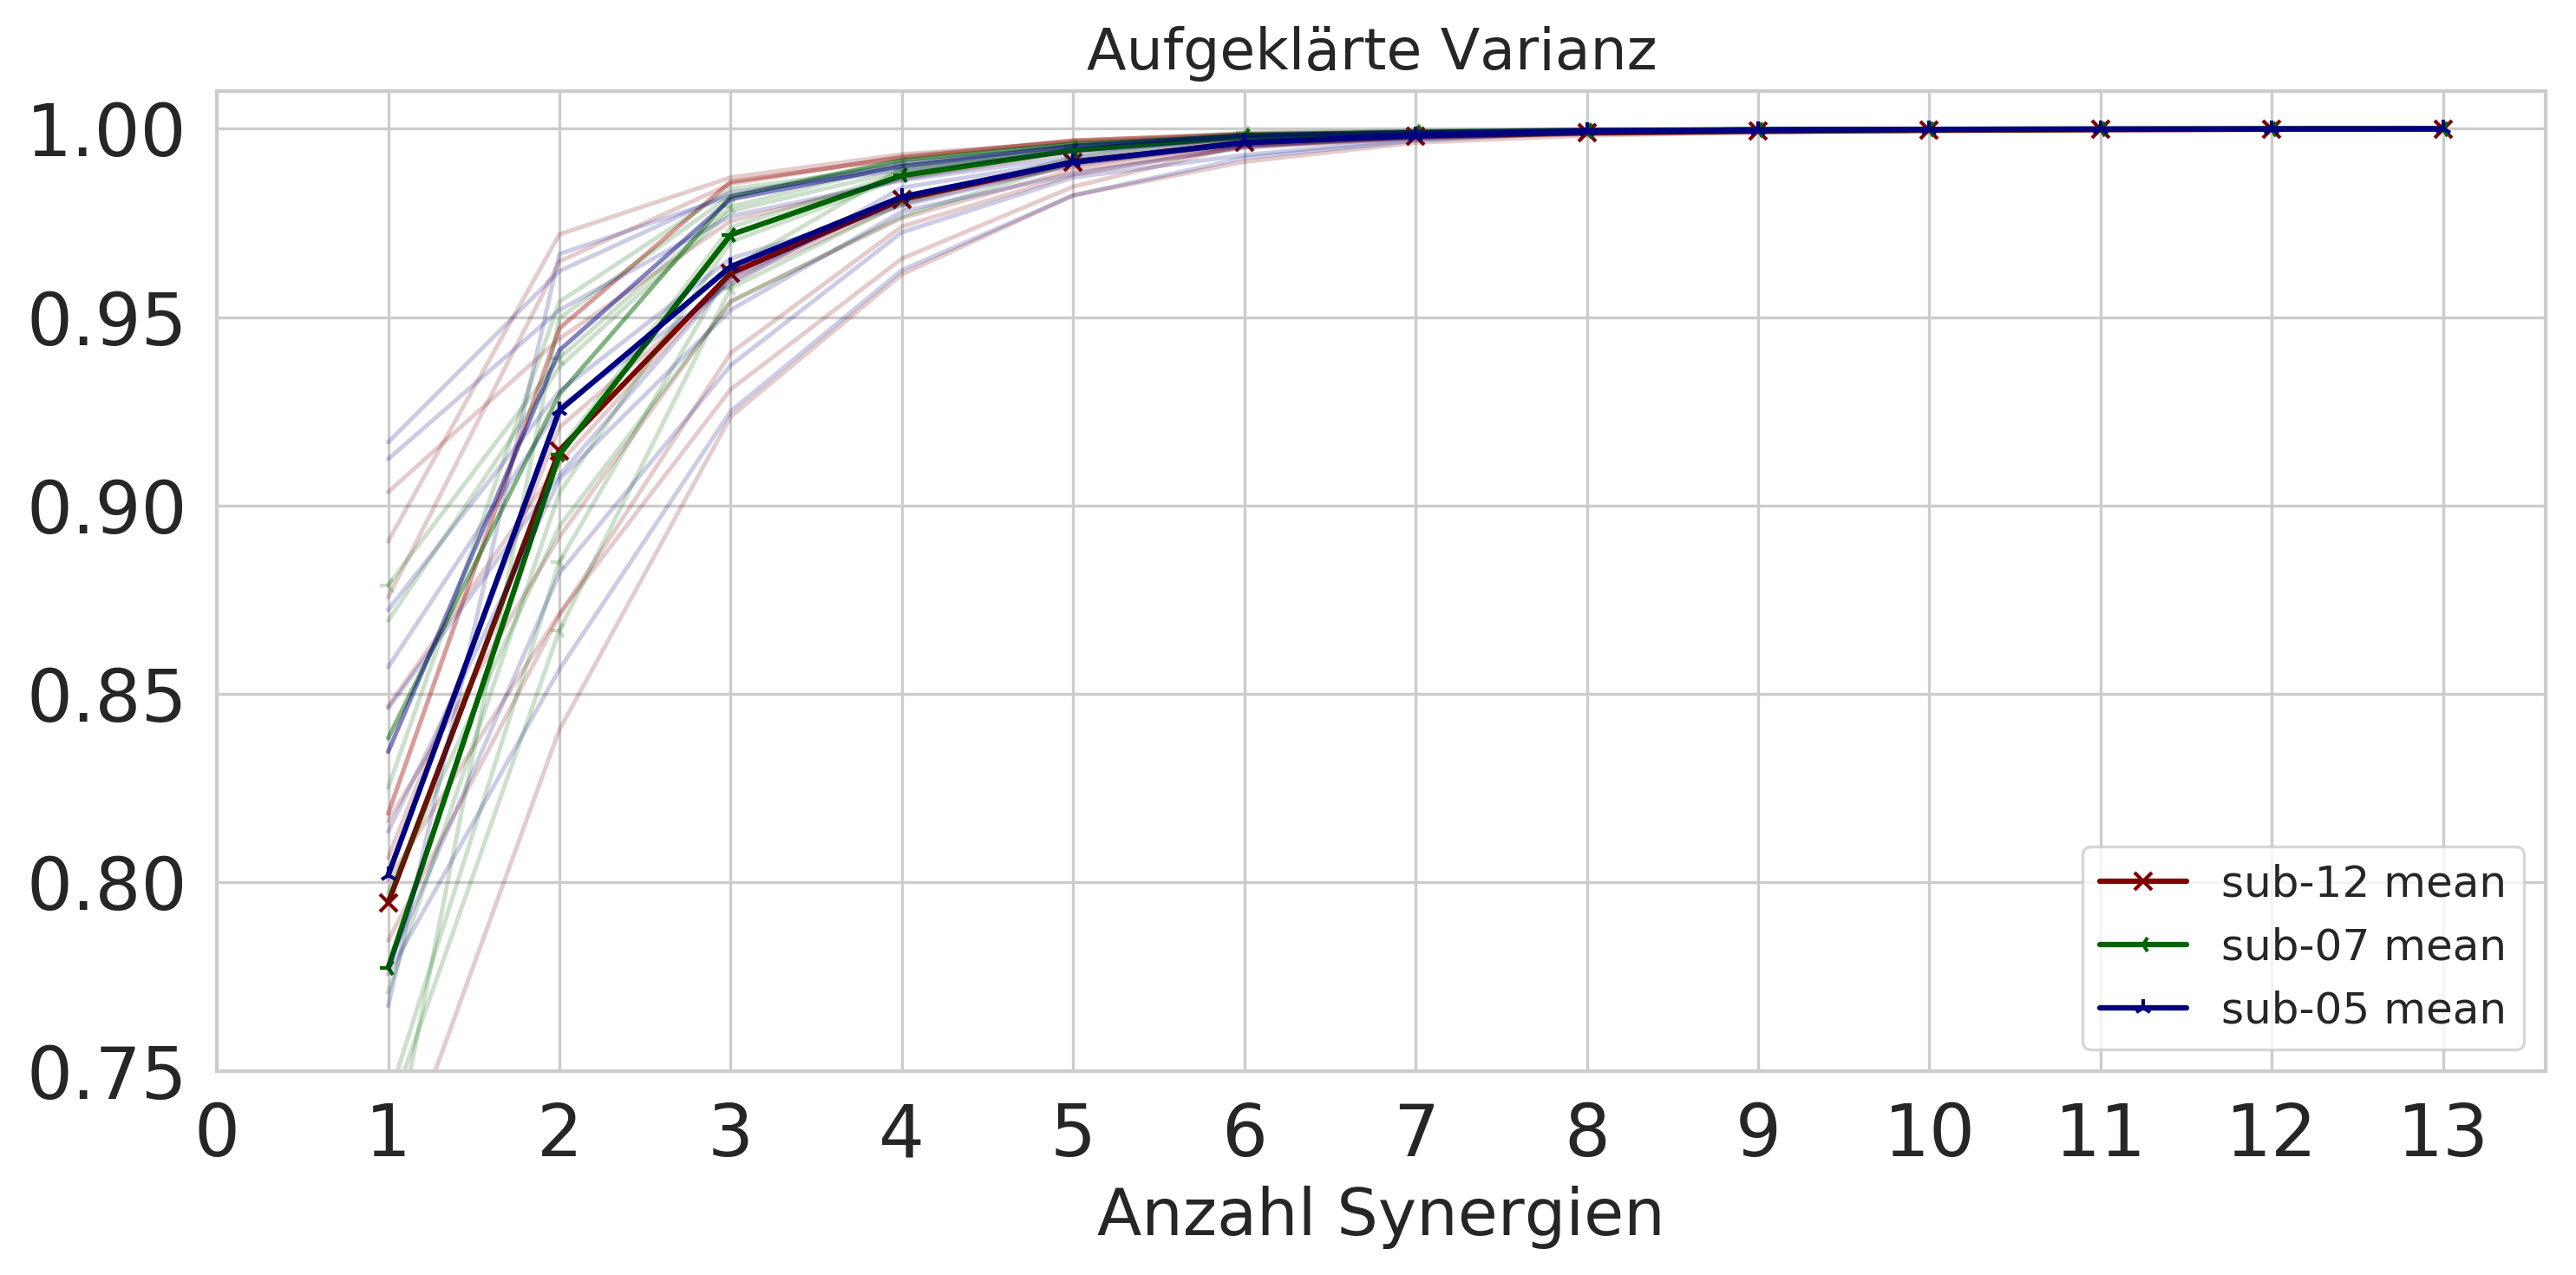

Subject Done!!


In [18]:

fig = plt.figure(figsize=(10,5))
plt.title('Aufgeklärte Varianz ',fontsize=16)
plt.plot(range(1,len(sub_12_mean)+1), sub_12_mean,marker='x',linewidth=1.5, alpha=1, color='maroon', label='sub-12 mean')
plt.plot(range(1,len(df_vafs['sub-12_r1'])+1), df_vafs['sub-12_r1'],alpha=0.2, color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_r2'])+1), df_vafs['sub-12_r2'],alpha=0.2, color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_r3'])+1), df_vafs['sub-12_r3'],alpha=0.2, color='maroon', label='')

plt.plot(range(1,len(df_vafs['sub-12_m1_r'])+1), df_vafs['sub-12_m1_r'],alpha=0.2,color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_m2_r'])+1), df_vafs['sub-12_m2_r'],alpha=0.2,  color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_m3_r'])+1), df_vafs['sub-12_m3_r'],alpha=0.2,color='maroon', label='')

plt.plot(range(1,len(df_vafs['sub-12_m1_l'])+1), df_vafs['sub-12_m1_l'],alpha=0.2,color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_m1_l'])+1), df_vafs['sub-12_m1_l'],alpha=0.2,color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_m1_l'])+1), df_vafs['sub-12_m1_l'],alpha=0.2,color='salmon', label='')

plt.plot(range(1,len(df_vafs['sub-12_l1'])+1), df_vafs['sub-12_l1'],alpha=0.2, color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_l2'])+1), df_vafs['sub-12_l2'],alpha=0.2, color='maroon', label='')
plt.plot(range(1,len(df_vafs['sub-12_l3'])+1), df_vafs['sub-12_l3'],alpha=0.2, color='maroon', label='')


plt.plot(range(1,len(df_vafs['sub-07_r1'])+1), sub_07_mean, marker='3', linewidth=1.5, alpha=1,color='darkgreen',label='sub-07 mean')
plt.plot(range(1,len(df_vafs['sub-07_r1'])+1), df_vafs['sub-07_r1'], marker='3',alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_r2'])+1), df_vafs['sub-07_r2'],marker='3',alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_r3'])+1), df_vafs['sub-07_r3'], marker='3',alpha=0.2,color='darkgreen', label='')

plt.plot(range(1,len(df_vafs['sub-07_m1_r'])+1), df_vafs['sub-07_m1_r'],alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_m2_r'])+1), df_vafs['sub-07_m2_r'], alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_m3_r'])+1), df_vafs['sub-07_m3_r'],alpha=0.2,color='darkgreen', label='')

plt.plot(range(1,len(df_vafs['sub-07_m1_l'])+1), df_vafs['sub-07_m1_l'],alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_m1_l'])+1), df_vafs['sub-07_m1_l'], alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_m1_l'])+1), df_vafs['sub-07_m1_l'],alpha=0.2,color='darkgreen', label='')

plt.plot(range(1,len(df_vafs['sub-07_l1'])+1), df_vafs['sub-07_l1'], alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_l2'])+1), df_vafs['sub-07_l2'], alpha=0.2,color='darkgreen', label='')
plt.plot(range(1,len(df_vafs['sub-07_l3'])+1), df_vafs['sub-07_l3'], alpha=0.2,color='darkgreen', label='')

plt.plot(range(1,len(df_vafs['sub-05_r1'])+1), sub_05_mean, marker='2',linewidth=1.5, alpha=1,color='navy',label='sub-05 mean')
plt.plot(range(1,len(df_vafs['sub-05_r1'])+1), df_vafs['sub-05_r1'], alpha=0.2,color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_r2'])+1), df_vafs['sub-05_r2'],alpha=0.2,color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_r3'])+1), df_vafs['sub-05_r3'],alpha=0.2,color='navy', label='')

plt.plot(range(1,len(df_vafs['sub-05_m1_r'])+1), df_vafs['sub-05_m1_r'],alpha=0.2,color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_m2_r'])+1), df_vafs['sub-05_m2_r'],alpha=0.2, color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_m3_r'])+1), df_vafs['sub-05_m3_r'], alpha=0.2,color='navy', label='')

plt.plot(range(1,len(df_vafs['sub-05_m1_l'])+1), df_vafs['sub-05_m1_l'],alpha=0.2, color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_m1_l'])+1), df_vafs['sub-05_m1_l'],alpha=0.2, color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_m1_l'])+1), df_vafs['sub-05_m1_l'],alpha=0.2, color='navy',label='')

plt.plot(range(1,len(df_vafs['sub-05_l1'])+1), df_vafs['sub-05_l1'],alpha=0.2,color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_l2'])+1), df_vafs['sub-05_l2'],alpha=0.2,color='navy', label='')
plt.plot(range(1,len(df_vafs['sub-05_l3'])+1), df_vafs['sub-05_l3'],alpha=0.2,color='navy', label='')

plt.xticks(np.arange(0, (len(r1_vaf)+1), 1))
# plt.yticks(np.arange(0.7, 1, 0.1))

plt.xlabel('Anzahl Synergien')
plt.legend()
plt.ylim(.75,1.01)
# fig.savef6g(path+'vafs/'+subject_id+'_vafs.png')
plt.show()
print('Subject Done!!')

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


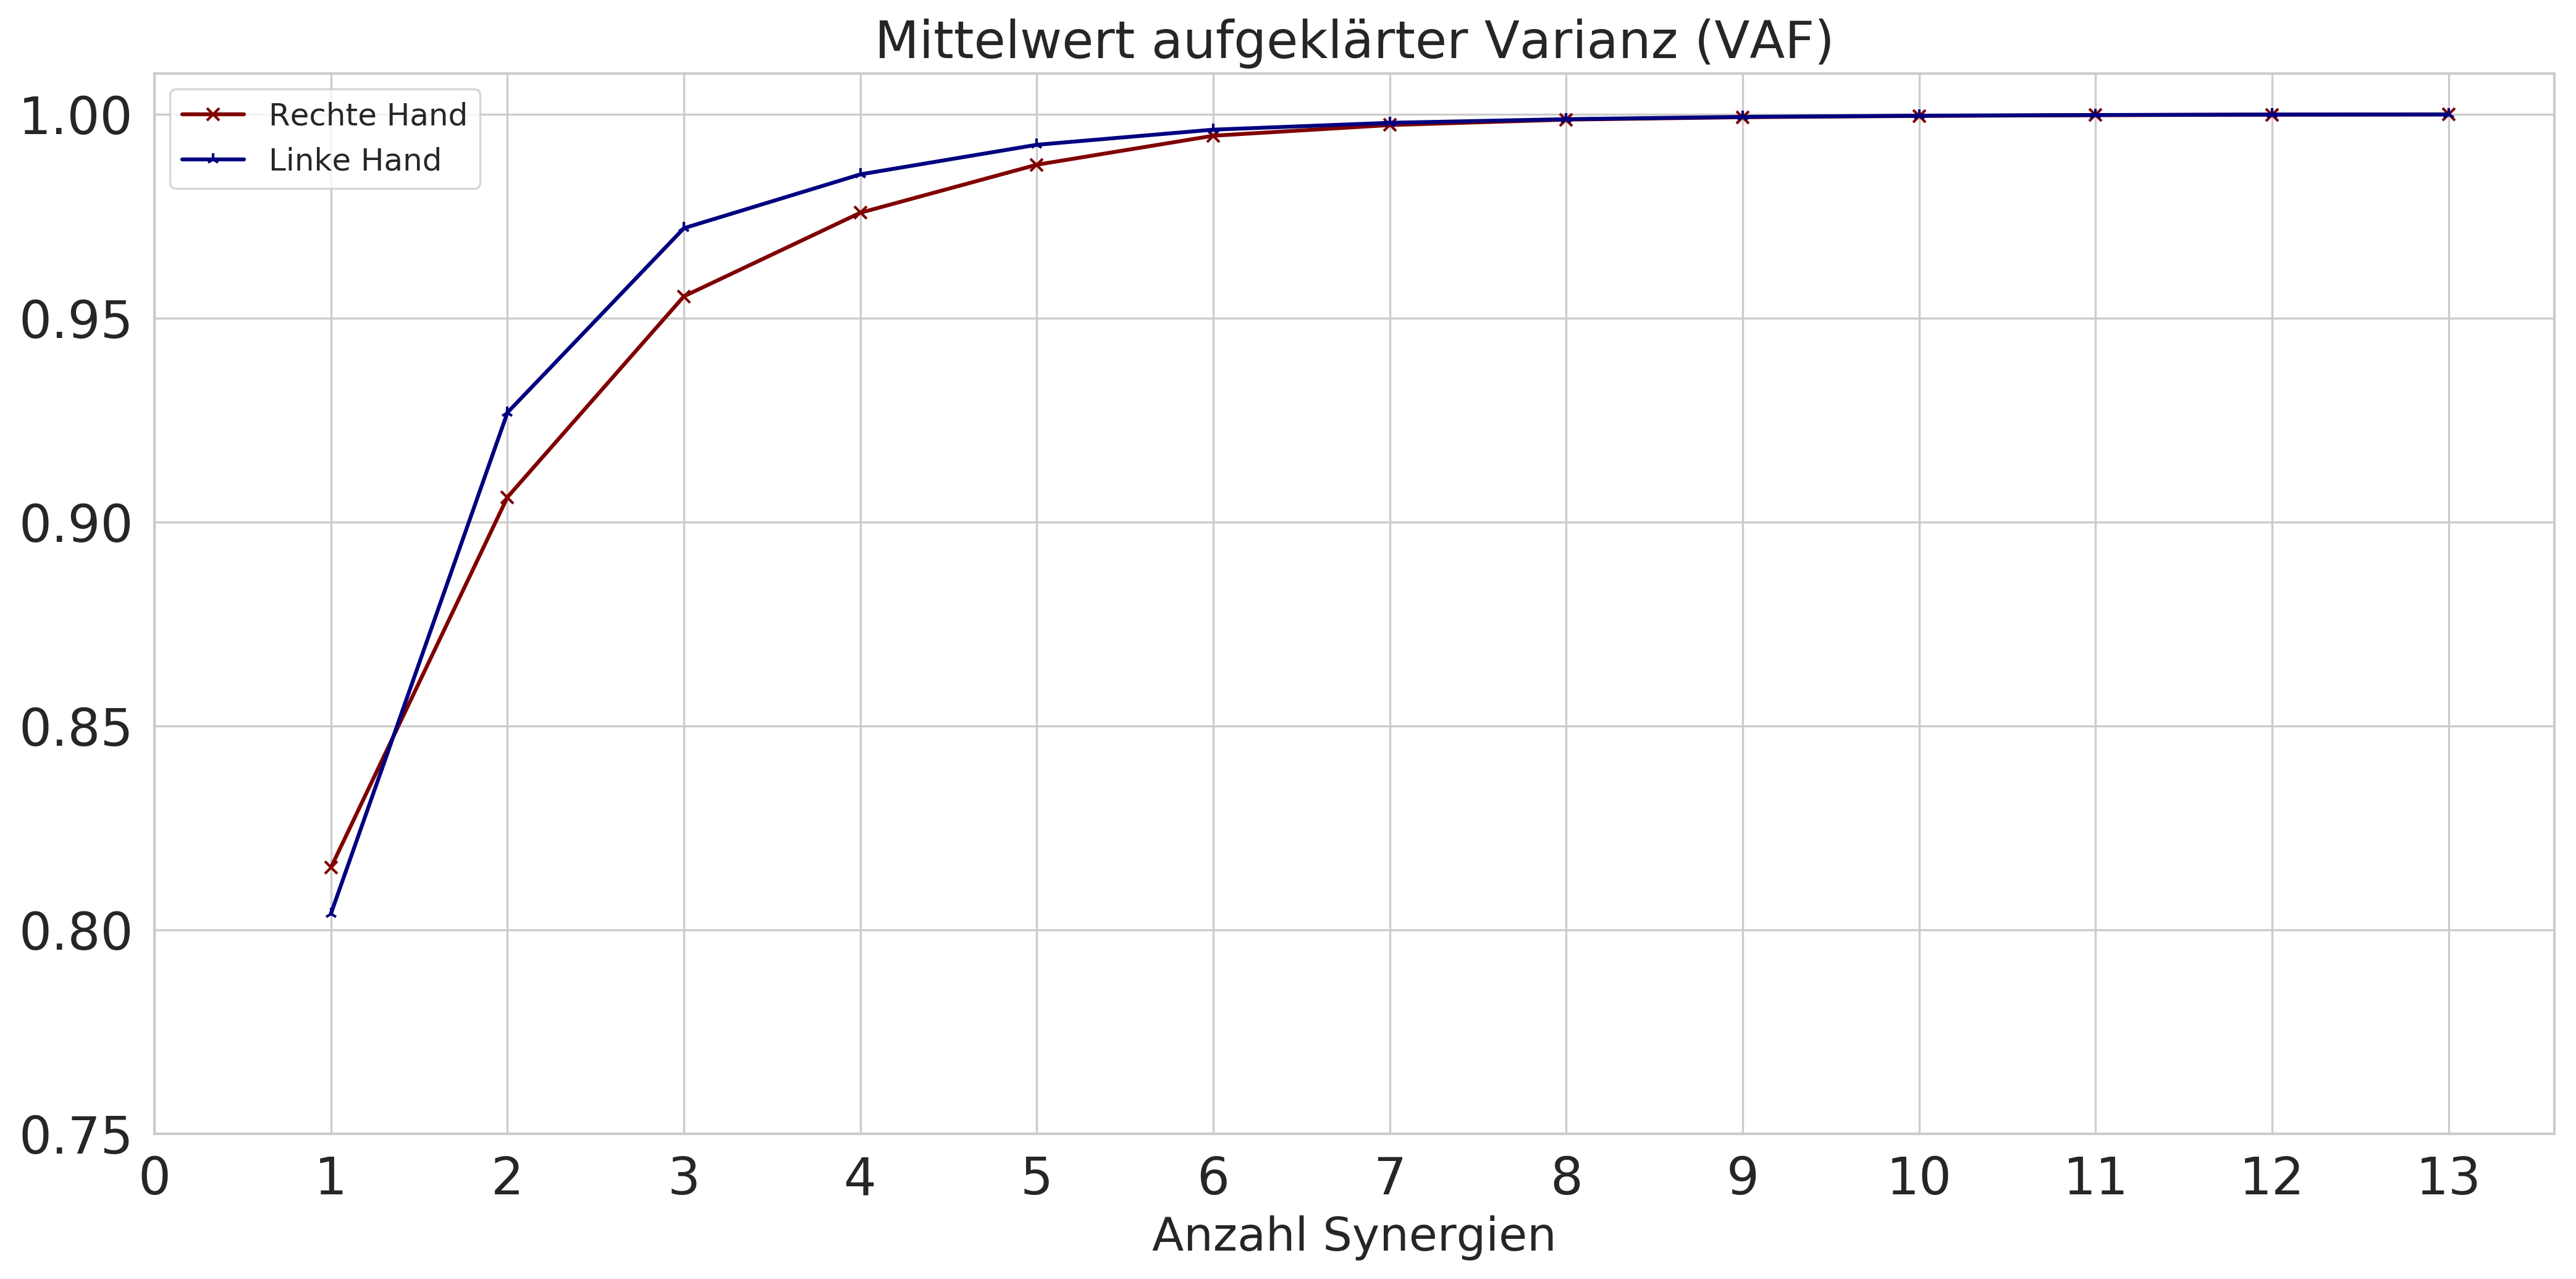

Subject Done!!


In [19]:


fig = plt.figure(figsize=(14,7))
plt.title('Aufgeklärte Varianz ',fontsize=16)
plt.title('Mittelwert aufgeklärter Varianz (VAF)')

plt.plot(range(1,len(right_mean)+1), right_mean,marker='x',linewidth=1.5, alpha=1, color='maroon', label='Rechte Hand')


plt.plot(range(1,len(left_mean)+1), left_mean, marker='2',linewidth=1.5, alpha=1,color='navy',label='Linke Hand')


plt.xticks(np.arange(0, (len(r1_vaf)+1), 1))
# plt.yticks(np.arange(0.7, 1, 0.1))

plt.xlabel('Anzahl Synergien')
plt.legend()
plt.ylim(.75,1.01)
# fig.savef6g(path+'vafs/'+subject_id+'_vafs.png')
plt.show()
print('Subject Done!!')